In [1]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import ticker, cm
from mpl_toolkits import mplot3d

from matplotlib.colors import ListedColormap
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline

from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

%matplotlib inline

In [2]:
X = np.array([[0.12, 2.26],
     [0.18, 1.62],
     [0.36, 3.00],
     [0.84, 3.5],
     [1.18, 4.08],
     [1.6, 4.14],
     [2.2, 4.18],
     [2.74, 4.06],
     [3.18, 3.72],
     [3.7, 3.44],
     [4.18, 3.5],
     [4.72, 3.84],
     [4.58, 3.5],
     [5.08, 4.64],
     [5.46, 5.3],
     [5.86, 5.74],
              
     [5.22, 3.66],
     [5.54, 4.14],
     [5.82, 4.55],
     [6, 5],
     [5, 3],
     [4.36, 2.72],
     [3.28, 2.79], 
     [2.68, 3.11],
     [2.32, 3.46],
     [1.86, 3.44],
     [1.42, 3.36],
     [1.24, 2.98],
     [1.02, 2.64],
     [0.89, 2.47],
     [0.67, 2.00],
     [0.52, 1.34],
     [0.48, 0.92],
     [3.90, 2.80],
])

y = [0] * 16
y.extend([1] * 18)

y = np.array(y)
print(len(X), len(y))

34 34


In [3]:
h = 0.1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.1)
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                 np.arange(y_min, y_max, h))

# just plot the dataset first
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

In [4]:
alphas = np.logspace(-1, 1, 5)

classifiers = []
names = []
for alpha in alphas:
    classifiers.append(make_pipeline(
        StandardScaler(),
        MLPClassifier(
            solver='lbfgs', alpha=alpha, random_state=1, max_iter=2000,
            early_stopping=True, hidden_layer_sizes=[100, 100],
        )
    ))
    names.append(f"alpha {alpha:.2f}")

In [5]:

# classifiers = [
#     KNeighborsClassifier(3),
#     SVC(gamma=2, C=1),
#     GaussianProcessClassifier(1.0 * RBF(1.0)),
#     DecisionTreeClassifier(max_depth=5),
#     RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
#     AdaBoostClassifier(),
#     GaussianNB(),
#     QuadraticDiscriminantAnalysis()]


# names = ["Nearest Neighbors", "RBF SVM", "Gaussian Process",
#          "Decision Tree", "Random Forest", "AdaBoost",
#          "Naive Bayes", "QDA"]

In [1]:
figure = plt.figure(figsize=(17, 3))
ax = plt.subplot(1, len(classifiers) + 1, 1)
# Plot the training points
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
# and testing points
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())
i=2
for name, clf in zip(names, classifiers):
    ax = plt.subplot(1, len(classifiers) + 1, i)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max] x [y_min, y_max].
    if hasattr(clf, "decision_function"):
        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

    # Put the result into a color plot
    print(Z)
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z) #cmap=cm, alpha=.8)

    # Plot also the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='black', s=25)
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
               alpha=0.6, edgecolors='black', s=25)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(name)
    ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
            size=15, horizontalalignment='right')
    i += 1
    break


figure.subplots_adjust(left=.02, right=.98)
plt.show()

NameError: name 'plt' is not defined

In [8]:
S = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
print(S)
S = S.reshape(xx.shape)

[0.00286078 0.01195336 0.0485386  ... 0.05569381 0.17423872 0.43016515]


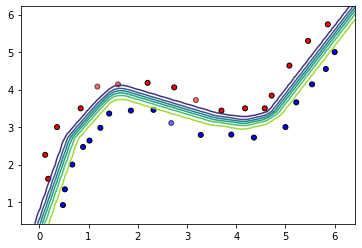

In [13]:
ax = plt.gca()
ax.contour(xx, yy, S)#, cmap = cm_bright)
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
           edgecolors='black', s=25)
# and testing points
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
           alpha=0.6, edgecolors='black', s=25)

ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
#ax.set_xticks(())
#ax.set_yticks(())
plt.show()

In [15]:
print((Z!=S).sum())

0


In [16]:
print(xx, yy)

[[-0.38 -0.28 -0.18 ...  6.22  6.32  6.42]
 [-0.38 -0.28 -0.18 ...  6.22  6.32  6.42]
 [-0.38 -0.28 -0.18 ...  6.22  6.32  6.42]
 ...
 [-0.38 -0.28 -0.18 ...  6.22  6.32  6.42]
 [-0.38 -0.28 -0.18 ...  6.22  6.32  6.42]
 [-0.38 -0.28 -0.18 ...  6.22  6.32  6.42]] [[0.42 0.42 0.42 ... 0.42 0.42 0.42]
 [0.52 0.52 0.52 ... 0.52 0.52 0.52]
 [0.62 0.62 0.62 ... 0.62 0.62 0.62]
 ...
 [6.02 6.02 6.02 ... 6.02 6.02 6.02]
 [6.12 6.12 6.12 ... 6.12 6.12 6.12]
 [6.22 6.22 6.22 ... 6.22 6.22 6.22]]


In [17]:
print(S.shape)

(59, 69)


In [18]:
print(S > 0.5)

[[False False False ...  True  True  True]
 [False False False ...  True  True  True]
 [False False False ...  True  True  True]
 ...
 [False False False ... False False  True]
 [False False False ... False False  True]
 [False False False ... False False False]]


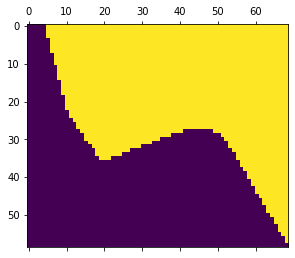

In [19]:
plt.matshow(S>0.5)
plt.show()

In [20]:
data = np.c_[xx.ravel(), yy.ravel()]

In [21]:
data.shape

(4071, 2)

In [22]:
label = (S > 0.5).ravel()
label = label[:, np.newaxis]

In [23]:
dataset = np.concatenate((data, label), axis = 1)

In [24]:
print(label.shape)

(4071, 1)


In [25]:
import pandas as pd

df = pd.DataFrame(dataset, columns=['X1','X2','Y'])
df.to_csv("synthetic.csv", index =False)

In [26]:
aa = list(range(len(df)))
import random
random.shuffle(aa)

In [27]:
train_idx = aa[0:int(0.5 * len(aa))]
query_idx = aa[int(0.5 * len(aa)): int(0.75 * len(aa))]
#val_idx = aa[int(0.65 * len(aa)): int(0.8 * len(aa))]
test_idx = aa[int(0.75 * len(aa)):]

In [28]:
train_df = df.iloc[train_idx]
query_df = df.iloc[query_idx]
# val_df = df.iloc[val_idx]
test_df = df.iloc[test_idx]

In [29]:
train_df.to_csv("synthetic_train.csv", index = False)
query_df.to_csv("synthetic_query.csv", index = False)
# val_df.to_csv("synthetic_val.csv", index = False)
test_df.to_csv("synthetic_test.csv", index= False)